theta_0:-28.8235
theta_1:3.5294
R^2: 0.5700
RMSE: 6.4033


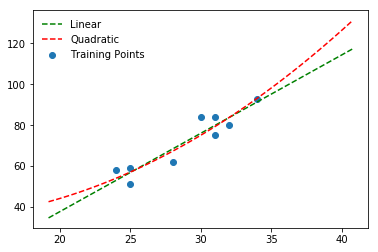

In [8]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1)
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(temperature, iced_tea_sales, test_size = 0.3, random_state = 123)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("theta_0:%.4f" % reg.intercept_)
print("theta_1:%.4f" % reg.coef_)



from sklearn.metrics import mean_squared_error, r2_score

y_hat = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print("R^2: %.4f" % r2_score(y_test, y_hat))
print("RMSE: %.4f" % rmse)









from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1)
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(temperature, iced_tea_sales, test_size = 0.3, random_state = 42)
lr = linear_model.LinearRegression()
pr_q = linear_model.LinearRegression()

# create quadratic terms
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train)

# fit linear model
lr.fit(X_train, y_train)
X_fit = np.linspace(min(X_train) * 0.8, max(X_train) * 1.2, 50).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)

# fit quadratic model
pr_q.fit(X_train_quad, y_train)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))

import matplotlib.pyplot as plt

# plotting
plt.scatter(X_train, y_train, label = "Training Points")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "g")
plt.plot(X_fit, y_quad_fit, label = "Quadratic", c = "r", linestyle = "--")
plt.legend(loc = "upper left", frameon = False)
plt.show()

In [9]:
#處理類別型變數（3）
#無順序性（性別、顏色、區域...等）：使用 pandas 的 get_dummies() 方法

#無順序性的類別資料 : dummy variable -->有就讓他變1，沒有就讓他變0

import pandas as pd

df = pd.DataFrame({
    "color": ["Red", "Green", "Blue"]
})

#因為R語言有factor這種資料型態，他背後其實是用1 2 3 在存資料，而不是字串。
#那python沒有factor這種資料型態，所以要做lable encoding

color_label = pd.get_dummies(df["color"])
color_label

,Blue,Green,Red
0,0,0,1
1,0,1,0
2,1,0,0


In [ ]:
#正規化（2）
#如何防止迴歸模型過度配適：        在成本函數J(θ)後面加上懲罰λ(正規化係數)

#為什麼我們要加θ1, θ2,...呢?
#因為我們的資料點可能會分散到最後有曲線彎彎曲曲的趨勢，所以我們才希望配適線有高次方。

#那過度配適的意思 : 像上面最右邊那個6次方的例子，看起來太像為了中間那段訓練資料而專門設計出來的h(x)，
# 而除了這段以外的資料跳出來可能讓h(x)表現得非常非常差，所以我們說在這端資料裡面陪視到太完美的華，就是over fitting

#當初在找h(x)的時候，就有把正規化係數一起加進成本函數再找

#Ridge Regression
#LASSO
#Elastic Net



#J(θ)Ridge=∑i=1m(yi^−yi)2+λθ2 
#J(θ)Ridge=∑i=1m(yi^−yi)2+λθ2
#J(θ)LASSO=∑i=1m(yi^−yi)2+λ|θ|
#J(θ)LASSO=∑i=1m(yi^−yi)2+λ|θ|
#J(θ)ElasticNet=∑i=1m(yi^−yi)2++λθ2+λ|θ|


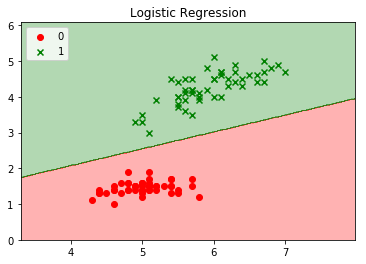

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

#推薦LogisticRegression!! 不推後面的Perceptron

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# 決策區域圖
def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('o', 'x', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)
        
iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
lr = LogisticRegression()
lr.fit(X, y)
plot_decision_region(X, y, classifier = lr)
plt.legend(loc = "upper left")
plt.title("Logistic Regression")
plt.show()

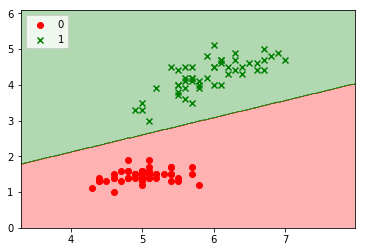

In [15]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
ppn = Perceptron()
ppn.fit(X, y)
plot_decision_region(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
#支持向量機(4)

#從回歸到分類器問題 : 
#為什麼要找decision boundary?  跟成本函數有關
#最小化成本函數!
#最適θ，最小MSE

#但現在支持向量機的邏輯，想要最小化成本函數，
#已經不是找最適θ，而是找最適 p(投影projection)!!
#p是x在θ上的投影

#        θ^T x
#      = θ0x0 +  θ1x1 + ... +  θnxn
#      = (證明省略)
#      = p ||θ||


# y=1 , θ^T x   >= 1
#       p ||θ|| >= 1
#      小  大
#   [  大  小  ]

# y=0 , θ^T x   <= -1
#       p ||θ|| <= -1
#      小  大
#   [  大  小  ]

#p的大小決定||θ||  (θ norm)的大小

#回到成本函數 : 成本函數 = min 1/2 ||θ||
#為了最小化成本函數，即為了最小化||θ|| ， 我們挑p大的

# p 即 margin邊界


#------------------------------------以上都是最大邊界 linear的分法------------------------------------

#只要把參數p改成kernel，就可以做線性不可分的了。這就是為什麼支持向量機受歡迎的原因!!!!!!!!

# kernel 相似度

#給一個新的函數來判斷資料點的相似程度
# --> kernel函數 : 衡量資料相似度的函數

# l 是 landmark的意思

# (x, l) = exp( -(||x - l||) / (2 sigma平方) ) ，其中(2 sigma平方) = gamma，gamma小=正規化程度高(可能bias高，variance低，under fitting)；gamma大=正規化程度小(可能bias低，variance高，over fitting)
#                因為norm是距離，所以這是在用 x 和 l 的"距離"來判斷資料相似度的函數


#正規化程度越低，代表條件越來越嚴格，(可能bias低，variance高，over fitting)，decision boundary越來越崎嶇，gamma調越大，會看到幾乎快變成一個data自己一個boundary，所以每一個data都分得很開，分得很清楚


# x     約等於 l 的話，exp(0) 約等於 1
# x 不是約等於 l 的話，exp(-large) 約等於 0


#        θ^T x
#      = θ0x0 +  θ1x1 + θ2(x2)^2 + ... +  θn(xn)^n   把cost0 , cost1 
#      = θ0f0 +  θ1f1 + θ2(x2)^2 + ... +  θn(fn)     改用相似度來衡量







#     http://scikit-learn.org/stable/tutorial/machine_learning_map/

#     http://scikit-learn.org/stable/modules/svm.html#classification                (SVC)









#總結 :  55:00

# SVM這個函數，有2種boundary產生的方法 : 1.最大邊界的分類  2.產出相似度的decision boundary，可以調換線性的kernel跟非線性的kernel
#線性的kernel就是換 "linear" 這個參數
#非線性的kernel就是換 "rbf" 這個參數
#                  然後gamma這個參數
#                  gamma小=正規化程度高(可能bias高，variance低，under fitting)；
#                  gamma大=正規化程度小(可能bias低，variance高，容易over fitting)

#怎麼評估分類演算法的好壞?
# 評估指標 : Confusion matrix 裡面的 accuracy 
# 準確率accuracy 
#  = (True positive + True negative) / (True positive + False positive型一錯誤 + True negative +False negative型二錯誤 )

#不斷秀出把gamma調高的過程 = 在demo從appropiate fitting 到 over fitting
# 把gamma調高 : 
#             在訓練資料這邊看到，哇，boundary切得好漂亮! 把每一個data分得好清楚! 
#             但是，拿測試資料來看的話，可能表現變很差喔，因為實在太像是為了訓練資料量身打造出的模型

#在try h(x) f(x) 相似程度的時候，要注意正規化問題(懲罰機制)，不然會出現over fitting
#適當的正規化，可以幫助拿捏bias跟variance之間的平衡!
# < 如果訓練資料跟測試資料的表現差很多的話，考慮加入正規化(懲罰機制)，使出現over fitting的情況變少!!! >











#線性decision boundary參數 : linear


#非線性decision boundary參數 : kernel，gamma   
# kernel 相似度
#給一個新的函數來判斷資料點的相似程度
# --> kernel函數 : 衡量資料相似度的函數

#gamma小=正規化程度高(可能bias高，variance低，under fitting)；
#gamma大=正規化程度小(可能bias低，variance高，over fitting)



#支持向量機（8）
#調高 gamma 參數的過程，其實就是demo一個對訓練資料配適（fitting）的過程    
#過高的 gamma 參數可以讓訓練資料完美的分類，但對測試資料的預測反而下滑  =  over fitting


#在try h(x) f(x) 相似度的時候，要注意正規化問題(懲罰機制)，不然會出現over fitting
#如果訓練資料跟測試資料的表現差很多的話，加入正規化(懲罰機制)，使出現over fitting的情況變少!!!